In [5]:
%pylab widget
from copy import deepcopy
from reed_up_downstream_dyn import ReedSimulation, calc_fixed_point
from json_object import JSONObject
from pypevoc.PVAnalysis import PV

Populating the interactive namespace from numpy and matplotlib


/Users/goios/Envs/unsw/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
with open('reed_simulation_dyn.json') as f:
    js = JSONObject(f)
   
js['environment/blowing pressure/value']=2200
#js['environment/perturbation time']=0.01
js['simulation/duration']=.4
# js['tracts/vocal/frequency independent losses']=0.1
# js['tracts/vocal/elements/0/length']=0.15
# js['tracts/vocal/elements/0/radius']=0.015
# js['tracts/vocal/elements/0/loss multiplier']=5
js['environment/frequency dependent losses']=True
js['environment/vocal tract enabled']=True
js['environment/reed/dynamic']=True
js['environment/reed/quality factor']=1.5
js['environment/reed/resonance frequency']=1500

js.to_python()



{'description': 'Reed simulation with vocal tract and reed dynamics',
 'version': '20200311',
 'simulation': {'sample rate': 48000, 'duration': 0.4, 'callback every': 1024},
 'environment': {'acoustic': {'_prefer': True,
   'speed of sound': 346.7492013525034,
   'density': 1.2,
   'viscosity': 1.884e-05},
  'physical': {'atmospheric pressure': 101500,
   'temperature': 36.5,
   'humidity': 100},
  'blowing pressure': {'_comment': "blowing pressure is 'value' from start if ramp not enabled",
   'value': 2200,
   'ramp duration': 0.1,
   '_choices_ramp_type': ['linear', 'exponential'],
   'ramp type': 'exponential',
   'ramp enabled': True},
  'reed': {'_comment': "reed moves instantaneously if 'dynamic' is false, that means res. freq and q are not taken into account",
   'stiffness': 500000000.0,
   'resonance frequency': 1500,
   'quality factor': 1.5,
   'rest opening': 1e-05,
   'dynamic': True},
  'noise': {'enabled': False, 'type': 'white', 'scale': 0.005},
  'frequency dependent 

In [1]:
def imp_resp(js, nfft=1024):
    sim = ReedSimulation()
    sim.from_json(js)
    impresp = sim.tracts['bore'].impulse_response(n=nfft)
    impresp_vt = sim.tracts['vocal'].impulse_response(n=nfft)
    return impresp, impresp_vt


In [3]:
impresp, impresp_vt = imp_resp(js)
f = np.arange(len(impresp_vt))/len(impresp_vt)*sr

rf=np.fft.fft(impresp_vt,n=nzfft)
z_vt=(1+rf)/(1-rf)*pckl['zch_vt']

f = np.arange(len(impresp_b))/len(impresp_b)*sr

rf=np.fft.fft(impresp_b,n=nzfft)
z_b=(1+rf)/(1-rf)*pckl['zch_b']


fig,ax = subplots(2,sharex=True)
ax[0].semilogy(np.abs(z_b))
ax[1].plot(np.angle(z_b))
ax[0].semilogy(np.abs(z_vt))
ax[1].plot(np.angle(z_vt))

NameError: name 'js' is not defined

In [10]:
sim = ReedSimulation()
sim.from_json(js)

In [11]:
sim.simulate()

applied perturbation at sample 97


In [12]:
p_b = sim.p_in + sim.p_out;
p_vt = sim.p_vt_in + sim.p_vt_out;

u = (sim.p_out - sim.p_in)/sim.zc_b;
u_sg = -(sim.p_vt_out - sim.p_vt_in)/sim.zc_vt

a = sim.a

In [13]:
figure()
plot(p_b)
plot(sim.p_blow+p_vt)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: divide by zero encountered in true_divide
  frat = fx / self.oldfft
/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: invalid value encountered in true_divide
  frat = fx / self.oldfft


FigureCanvasNbAgg()

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:335: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(self.mag)


(0, 1000)

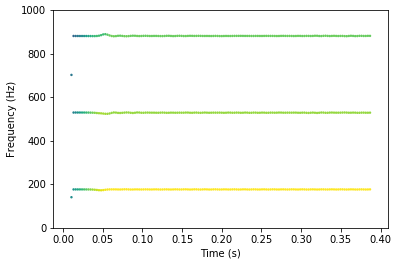

In [119]:
pv = PV(p_b,sr=sim.sr,nfft=512*2,hop=128)
pv.run_pv()
pv.plot_time_freq()
ylim(0,1000)

FigureCanvasNbAgg()

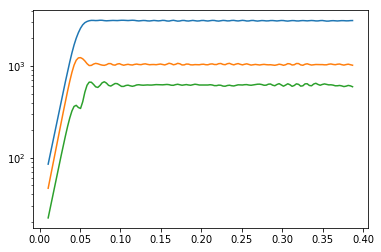

In [120]:
figure()

semilogy(pv.t,pv.mag[:,:3])

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: divide by zero encountered in true_divide
  frat = fx / self.oldfft
/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:171: RuntimeWarning: invalid value encountered in true_divide
  frat = fx / self.oldfft


FigureCanvasNbAgg()

/Users/goios/Devel/pypevoc/pypevoc/PVAnalysis.py:335: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(self.mag)


(0, 1000)

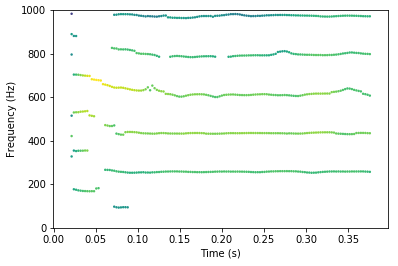

In [122]:
pv = PV(p_vt,sr=sim.sr,nfft=512*4,hop=128,pkthresh=1e-9,npks=100)
pv.run_pv()
pv.plot_time_freq()
ylim(0,1000)

(0, 1000)

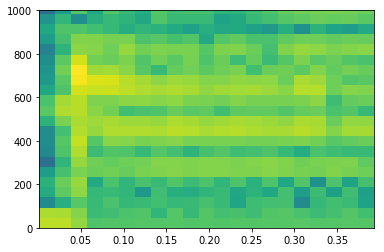

In [111]:
figure()
specgram(p_vt,Fs=sim.sr,NFFT=2**10);
ylim(0,1000)

In [123]:
js['tracts'].visititems(print)

['vocal', 'description'] single wide pipe
['vocal', 'frequency independent losses'] 0.3
['vocal', 'elements', 0, 'type'] cylinder
['vocal', 'elements', 0, 'length'] 0.15
['vocal', 'elements', 0, 'radius'] 0.02
['vocal', 'elements', 0, 'loss_multiplier'] 5
['vocal', 'elements', 1, 'type'] termination
['vocal', 'elements', 1, 'kind'] open
['bore', 'description'] single clarinet-like cylinder
['bore', 'frequency independent losses'] 0.01
['bore', 'elements', 0, 'type'] cylinder
['bore', 'elements', 0, 'length'] 0.5
['bore', 'elements', 0, 'radius'] 0.0075
['bore', 'elements', 0, 'loss_multiplier'] 1
['bore', 'elements', 1, 'type'] termination
['bore', 'elements', 1, 'kind'] open
